In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [2]:
data = pd.read_csv('china_gdp.csv')
data.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


In [13]:
"""

y = mx + b
y = b0 + b1 * x

y_predicted = b0 + (m^2 * x)

"""

def y_pred(x, a, b):
    # y_predicted = b0 + a * (m * x)^2
    return a * np.exp(b * x)

[1.96  1.961 1.962 1.963 1.964 1.965 1.966 1.967 1.968 1.969 1.97  1.971
 1.972 1.973 1.974 1.975 1.976 1.977 1.978 1.979 1.98  1.981 1.982 1.983
 1.984 1.985 1.986 1.987 1.988 1.989 1.99  1.991 1.992 1.993 1.994 1.995
 1.996 1.997 1.998 1.999 2.    2.001 2.002 2.003 2.004 2.005 2.006 2.007
 2.008 2.009 2.01  2.011 2.012 2.013 2.014]
[   5.91841165    4.95570502    4.66851785    5.00973033    5.90622549
    6.97091531    7.58794348    7.20570286    6.99934979    7.87188205
    9.15062113    9.85620238   11.21598136   13.67698784   14.22547421
   16.11624922   15.16276874   17.23490143   14.83821115   17.68565254
   18.96499925   19.43690491   20.35496272   22.89502008   25.80821473
   30.74795859   29.8805793    27.13497735   31.07222137   34.59574859
   35.897323     38.14547038   42.49340659   44.28745964   56.22611299
   73.20320452   86.0844098    95.81594248  102.52769021  108.94471087
  120.52606784  133.22347199  146.19064879  164.99287181  194.17456022
  226.85989041  272.97840

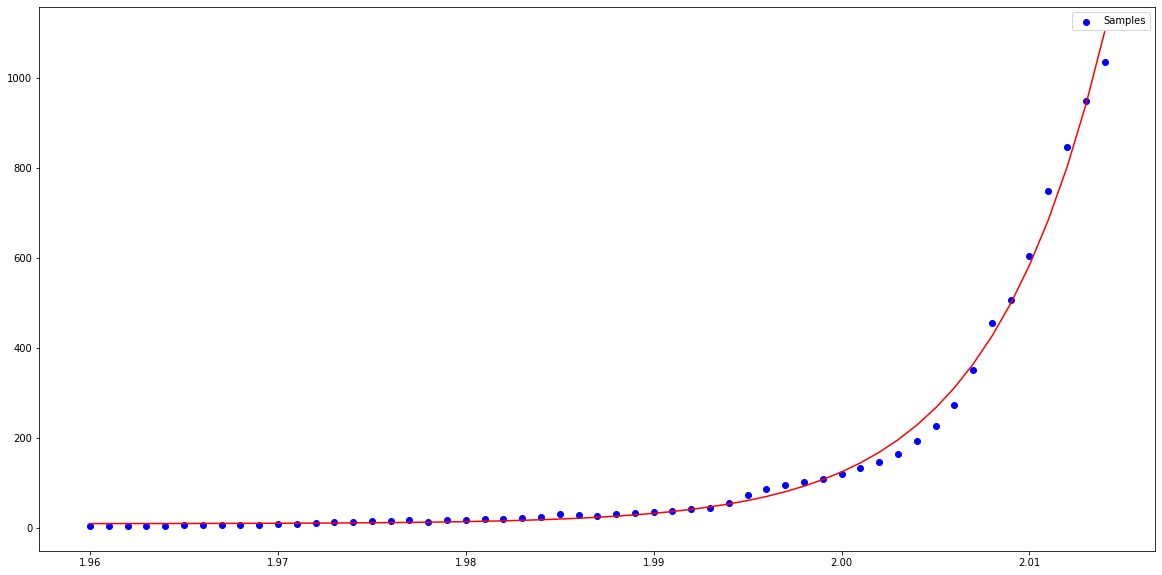

In [136]:
# function [yhat] = my_function(x, a)

#     yhat = x^a

# end



def func(x, a, b, c):
    return a + (b * np.exp(x * c))

x = data['Year'].values / 1000
y = data['Value'].values / 10000000000

print(x)
print(y)

coef, cov = curve_fit(func, x, y, maxfev=50000)
print(coef)

y_pred = func(x, *coef)
print(y_pred)

plt.scatter(x, y, color='blue', label='Samples')
plt.plot(x, y_pred, color='red')
plt.legend()
plt.show()

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 5000.

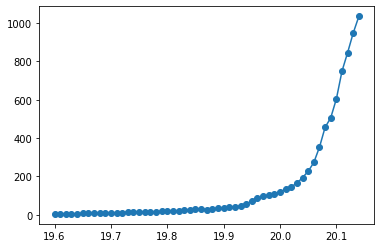

In [6]:
plt.scatter(x, y)
plt.plot(x, y)

coef, cov = curve_fit(y_pred, x, y, maxfev=5000)

print(coef)
xFit = np.arange(0, 5, 0.01)
plt.plot(xFit, [y_pred(i, *coef) for i in xFit])

[0.45065853 1.62210344]
1500.3772522247557


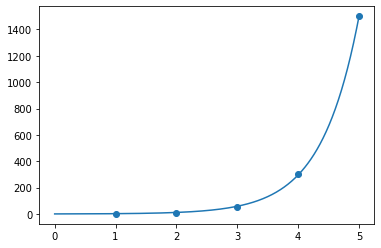

In [14]:

"""

def y_pred(x, a, b):
    return a * np.exp(b * x)

f(x) = 0.45065853 * (1.62210344 * x[i])^2
f(x) = x[i]^2 * b

"""

xData = [1, 2, 3, 4, 5]
yData = [1, 9, 50, 300, 1500]

plt.scatter(xData, yData)
#plt.plot(xData, yData)

coef, cov = curve_fit(y_pred, xData, yData, maxfev=5000)

print(coef)
xFit = np.arange(0, 5, 0.01)
plt.plot(xFit, [y_pred(i, *coef) for i in xFit])
print(y_pred(5, *coef))

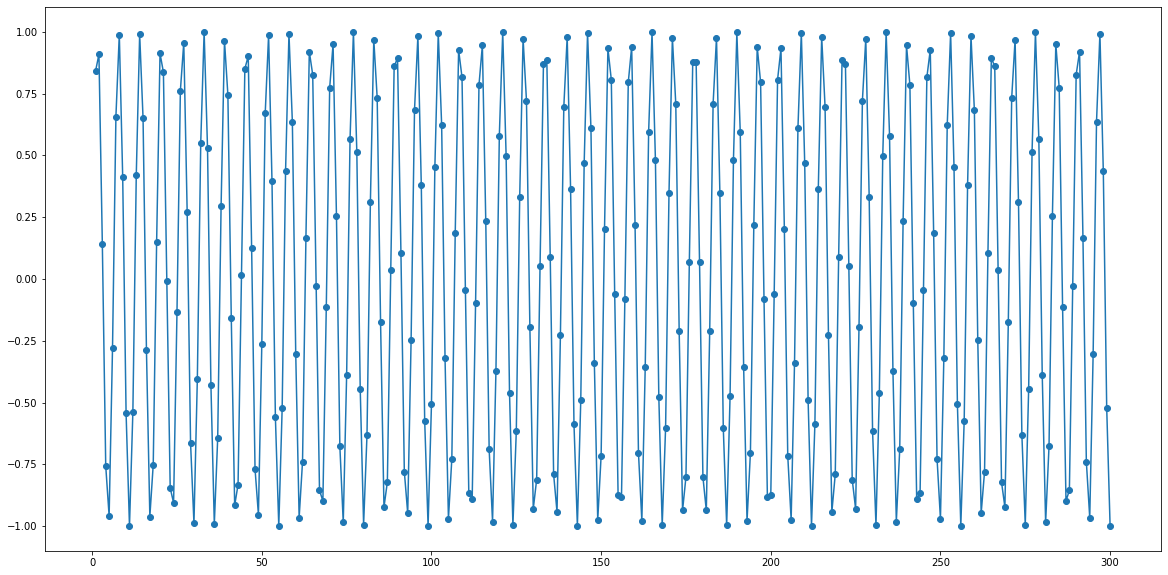

In [28]:
x = np.linspace(1, 300, 300)
y = [np.sin(i) for i in x]

plt.scatter(x, y)
plt.plot(x, y)